In [1]:
import os
os.chdir('..')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer(analyzer='char', lowercase=False, ngram_range=(1,10))
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(4, 541)


In [5]:
vectorizer.get_feature_names_out()

array([' ', ' d', ' do', ' doc', ' docu', ' docum', ' docume', ' documen',
       ' document', ' document ', ' document.', ' document?', ' f', ' fi',
       ' fir', ' firs', ' first', ' first ', ' first d', ' first do',
       ' first doc', ' i', ' is', ' is ', ' is t', ' is th', ' is the',
       ' is the ', ' is the f', ' is the fi', ' is the s', ' is the se',
       ' is the t', ' is the th', ' o', ' on', ' one', ' one.', ' s',
       ' se', ' sec', ' seco', ' secon', ' second', ' second ',
       ' second d', ' second do', ' t', ' th', ' the', ' the ', ' the f',
       ' the fi', ' the fir', ' the firs', ' the first', ' the s',
       ' the se', ' the sec', ' the seco', ' the secon', ' the t',
       ' the th', ' the thi', ' the thir', ' the third', ' thi', ' thir',
       ' third', ' third ', ' third o', ' third on', ' third one',
       ' this', ' this ', ' this i', ' this is', ' this is ',
       ' this is t', ' this t', ' this th', ' this the', ' this the ',
       '.', '?', 'A

In [6]:
[print(i) for i in X[0]]

  (0, 10)	0.07005588127563787
  (0, 477)	0.07005588127563787
  (0, 467)	0.07005588127563787
  (0, 408)	0.07005588127563787
  (0, 298)	0.07005588127563787
  (0, 230)	0.07005588127563787
  (0, 20)	0.07005588127563787
  (0, 183)	0.07005588127563787
  (0, 240)	0.07005588127563787
  (0, 496)	0.07005588127563787
  (0, 55)	0.07005588127563787
  (0, 435)	0.07005588127563787
  (0, 321)	0.07005588127563787
  (0, 29)	0.08885700235024235
  (0, 426)	0.08885700235024235
  (0, 314)	0.07005588127563787
  (0, 276)	0.07005588127563787
  (0, 119)	0.08885700235024235
  (0, 172)	0.07005588127563787
  (0, 8)	0.056716273583140187
  (0, 476)	0.07005588127563787
  (0, 466)	0.07005588127563787
  (0, 407)	0.07005588127563787
  (0, 297)	0.07005588127563787
  (0, 229)	0.07005588127563787
  :	:
  (0, 175)	0.046369270002855546
  (0, 232)	0.046369270002855546
  (0, 488)	0.046369270002855546
  (0, 47)	0.046369270002855546
  (0, 21)	0.056716273583140187
  (0, 410)	0.09273854000571109
  (0, 299)	0.09273854000571109
  (0

[None]

In [7]:
vectorizer2 = TfidfVectorizer(analyzer='char', lowercase=False, ngram_range=(1,1))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
print(X2.shape)
[print(i) for i in X2[0]]

(4, 19)
  (0, 1)	0.15050659189436344
  (0, 13)	0.12304900085738198
  (0, 12)	0.15050659189436344
  (0, 18)	0.15050659189436344
  (0, 6)	0.15050659189436344
  (0, 14)	0.12304900085738198
  (0, 7)	0.12304900085738198
  (0, 15)	0.15050659189436344
  (0, 9)	0.18590558347413605
  (0, 8)	0.24609800171476395
  (0, 17)	0.36914700257214594
  (0, 0)	0.4921960034295279
  (0, 16)	0.36914700257214594
  (0, 11)	0.36914700257214594
  (0, 10)	0.24609800171476395
  (0, 5)	0.18590558347413605


[None]

In [8]:
vectorizer2.idf_

array([1.        , 1.22314355, 1.91629073, 1.91629073, 1.91629073,
       1.51082562, 1.22314355, 1.        , 1.        , 1.51082562,
       1.        , 1.        , 1.22314355, 1.        , 1.        ,
       1.22314355, 1.        , 1.        , 1.22314355])

In [9]:
vectorizer2.get_feature_names_out()

array([' ', '.', '?', 'A', 'I', 'T', 'c', 'd', 'e', 'f', 'h', 'i', 'm',
       'n', 'o', 'r', 's', 't', 'u'], dtype=object)

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('data/nlp/text_emotion.csv')
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [12]:
import re

In [13]:
re.sub(r'@([a-z0-9_]+)', '@user', df['content'].values[0])

'@user i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [14]:
df['content_prep'] = df['content'].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]+)', '@user', x))
df['content_prep']

0        @user i know  i was listenin to bad habit earl...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @user We want to trade with someone who has Ho...
                               ...                        
39995                                                @user
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @user WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OU...
39999    @user bullet train from tokyo    the gf and i ...
Name: content_prep, Length: 40000, dtype: object

In [15]:
df['content_prep'].apply(len).describe()

count    40000.000000
mean        70.318475
std         36.226566
min          1.000000
25%         40.000000
50%         66.000000
75%         99.000000
max        167.000000
Name: content_prep, dtype: float64

In [16]:
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [17]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [18]:
train, test = train_test_split(
    df, test_size=0.2, 
    random_state=42, stratify=df['sentiment'])

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 32000
Test: 8000


In [19]:
train['sentiment'].value_counts()

sentiment
neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: count, dtype: int64

In [20]:
test['sentiment'].value_counts()

sentiment
neutral       1728
worry         1692
happiness     1042
sadness       1033
love           768
surprise       437
fun            355
relief         305
hate           265
empty          165
enthusiasm     152
boredom         36
anger           22
Name: count, dtype: int64

In [21]:
vectorizer = TfidfVectorizer(analyzer='char', lowercase=False, ngram_range=(1,1))
vectorizer.fit(train['content_prep'])
channels = vectorizer.get_feature_names_out()
channels_idf = vectorizer.idf_
[print(i) for i in list(zip(channels, channels_idf))]

('\t', 10.680375250733647)
(' ', 1.0041961607258716)
('!', 2.2263348743226787)
('#', 4.875240281817159)
('$', 6.537240524342114)
('%', 7.366189246061122)
('&', 3.8713359446906677)
("'", 2.153825964393385)
('(', 4.675254377178179)
(')', 4.5458931967907406)
('*', 5.41251709167032)
('+', 6.483173303071839)
(',', 2.4520648523457096)
('-', 3.5684553870351032)
('.', 1.667876247209456)
('/', 3.7445185416406352)
('0', 4.262010314797436)
('1', 4.106695083773001)
('2', 3.9845763336751556)
('3', 4.225176687393525)
('4', 4.318209587953841)
('5', 4.602733007384613)
('6', 4.91832386795347)
('7', 5.135197806254085)
('8', 5.117772389540225)
('9', 5.1629223542689395)
(':', 3.559526756290802)
(';', 3.71387947672891)
('=', 6.007546416271741)
('?', 3.2367115676180562)
('@', 1.7317893291993296)
('A', 3.1229023491189007)
('B', 3.5265414491548044)
('C', 3.6156162229418456)
('D', 3.410410372314303)
('E', 3.6979764287557444)
('F', 3.879092216262027)
('G', 3.4972635489903663)
('H', 3.1112214895061454)
('I', 2.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [22]:
df_keys = pd.DataFrame(
    data={'char': channels, 
          'freq': channels_idf}).sort_values(
    'freq', ascending=False)

/opt/anaconda3/envs/audio2/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/audio2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


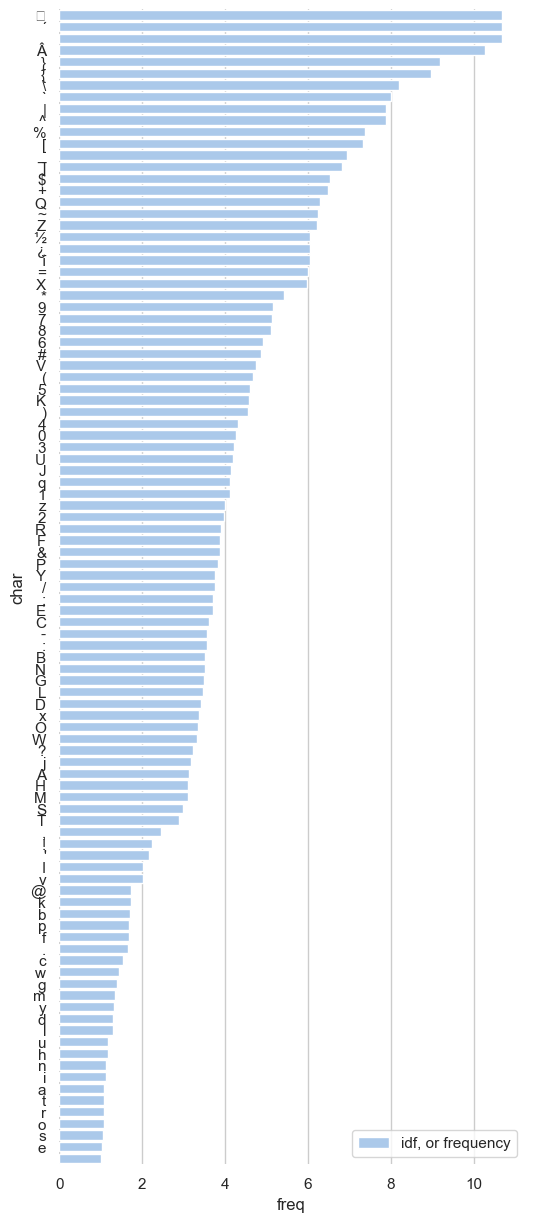

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x='freq', y='char', data=df_keys,
            label='idf, or frequency', color="b")
sns.despine(left=True, bottom=True)

In [24]:
df_keys[df_keys['char']=='a']['freq'].values[0]

1.0904689441749886

In [25]:
channels_idf[np.argwhere(channels=='a').flatten()[0]]

1.0904689441749886

speaking rate for English is 4 syllables per second => sr = 20
https://en.wikipedia.org/wiki/Speech_tempo

In [26]:
def get_ngrams(text, n=5, stride=1):
    count_grams = len(text) // stride
    grams = [text[i*stride: i*stride + n] for i in range(count_grams)]
    return grams

get_ngrams(corpus[0], n=10, stride=4)

['This is th',
 ' is the fi',
 'the first ',
 'first docu',
 't document',
 'cument.']

In [27]:
import functools as ft
from collections import Counter

In [28]:
Counter(train['content_prep'].values)

Counter({'@user': 64,
         '@user I am lost. Please help me find a good home.': 17,
         '@user thanks': 14,
         '@user Thanks': 13,
         'FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone': 13,
         '@user Hi I have uploaded 5 completely new Chinese Lessons on www.youtube.com/ChineseLearn Please feel free to watch and enjoy': 12,
         'I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9': 12,
         '@user thank you': 11,
         "Happy Mother's Day!": 10,
         'Happy Mothers Day': 9,
         '@user me too': 8,
         '@user Thanks!': 8,
         '@user Thank you!': 8,
         "happy mother's day": 7,
         "@user Thought you might be interested in @user http://tweetphoto.com. See who's viewing your photos!": 6,
         'http://snipurl.com/hq0n1 Just printed my mom an Amazon gift card  for Happy Mothers Day talk about last minute.': 5,
         'ha

In [29]:
train_cnt = Counter(' '.join(train['content_prep'].values))
train_cnt_total = sum(train_cnt.values())
for (c, i) in train_cnt.most_common():
    print(f'{c}: {i / train_cnt_total: .4f}')

 :  0.1915
e:  0.0797
t:  0.0632
o:  0.0631
a:  0.0542
s:  0.0466
i:  0.0455
n:  0.0450
r:  0.0406
h:  0.0344
u:  0.0294
l:  0.0293
d:  0.0245
m:  0.0221
y:  0.0216
g:  0.0188
.:  0.0179
w:  0.0174
c:  0.0152
p:  0.0129
f:  0.0122
b:  0.0108
k:  0.0101
!:  0.0077
I:  0.0075
@:  0.0072
v:  0.0068
':  0.0058
,:  0.0043
T:  0.0028
S:  0.0024
?:  0.0024
/:  0.0023
A:  0.0023
H:  0.0021
M:  0.0021
O:  0.0020
j:  0.0017
L:  0.0017
x:  0.0016
E:  0.0016
W:  0.0016
N:  0.0015
D:  0.0015
;:  0.0014
-:  0.0014
G:  0.0013
B:  0.0013
&:  0.0012
::  0.0012
C:  0.0012
Y:  0.0011
P:  0.0010
R:  0.0010
q:  0.0010
F:  0.0009
z:  0.0009
2:  0.0008
0:  0.0008
1:  0.0008
U:  0.0007
3:  0.0007
J:  0.0006
4:  0.0005
):  0.0004
K:  0.0004
5:  0.0004
(:  0.0004
V:  0.0004
*:  0.0003
#:  0.0003
6:  0.0003
8:  0.0003
9:  0.0003
7:  0.0002
ï:  0.0002
¿:  0.0002
½:  0.0002
X:  0.0001
=:  0.0001
~:  0.0001
Z:  0.0001
$:  0.0001
Q:  0.0001
+:  0.0001
_:  0.0001
]:  0.0000
^:  0.0000
%:  0.0000
[:  0.0000
`:  0.0000

In [30]:
train_cnt = Counter(' '.join(train['content_prep'].values))
train_cnt_total = sum(train_cnt.values())

train_cnt_values = []
for (c, i) in train_cnt.most_common():
    v = -1 / np.log(i / train_cnt_total)
    train_cnt_values.append(v)
    print(f'{c}: {v: .4f}')

 :  0.6051
e:  0.3952
t:  0.3621
o:  0.3618
a:  0.3431
s:  0.3260
i:  0.3237
n:  0.3225
r:  0.3121
h:  0.2968
u:  0.2835
l:  0.2833
d:  0.2697
m:  0.2622
y:  0.2606
g:  0.2516
.:  0.2485
w:  0.2467
c:  0.2389
p:  0.2300
f:  0.2271
b:  0.2207
k:  0.2175
!:  0.2052
I:  0.2041
@:  0.2025
v:  0.2002
':  0.1943
,:  0.1839
T:  0.1705
S:  0.1660
?:  0.1657
/:  0.1651
A:  0.1649
H:  0.1625
M:  0.1620
O:  0.1608
j:  0.1573
L:  0.1562
x:  0.1559
E:  0.1555
W:  0.1548
N:  0.1536
D:  0.1536
;:  0.1525
-:  0.1521
G:  0.1510
B:  0.1508
&:  0.1495
::  0.1493
C:  0.1486
Y:  0.1472
P:  0.1448
R:  0.1445
q:  0.1443
F:  0.1430
z:  0.1421
2:  0.1414
0:  0.1408
1:  0.1396
U:  0.1377
3:  0.1365
J:  0.1361
4:  0.1331
):  0.1296
K:  0.1296
5:  0.1289
(:  0.1270
V:  0.1264
*:  0.1253
#:  0.1253
6:  0.1248
8:  0.1208
9:  0.1206
7:  0.1204
ï:  0.1138
¿:  0.1138
½:  0.1138
X:  0.1103
=:  0.1094
~:  0.1080
Z:  0.1069
$:  0.1049
Q:  0.1048
+:  0.1043
_:  0.1024
]:  0.0994
^:  0.0945
%:  0.0944
[:  0.0944
`:  0.0927

In [31]:
pd.Series(train_cnt_values).describe()

count    99.000000
mean      0.172238
std       0.085540
min       0.068307
25%       0.120541
50%       0.149326
75%       0.203315
max       0.605053
dtype: float64

In [32]:
train_cnt = Counter(' '.join(train['content_prep'].values))
train_cnt_total = sum(train_cnt.values())

train_cnt_values = []
for (c, i) in train_cnt.most_common():
    v = np.log(train_cnt_total/i)
    train_cnt_values.append(v)
    print(f'{c}: {v: .4f}')

 :  1.6527
e:  2.5301
t:  2.7617
o:  2.7636
a:  2.9145
s:  3.0671
i:  3.0891
n:  3.1005
r:  3.2036
h:  3.3691
u:  3.5269
l:  3.5304
d:  3.7082
m:  3.8140
y:  3.8366
g:  3.9744
.:  4.0235
w:  4.0541
c:  4.1859
p:  4.3480
f:  4.4033
b:  4.5303
k:  4.5977
!:  4.8724
I:  4.8989
@:  4.9382
v:  4.9956
':  5.1466
,:  5.4391
T:  5.8664
S:  6.0231
?:  6.0350
/:  6.0578
A:  6.0653
H:  6.1535
M:  6.1733
O:  6.2178
j:  6.3568
L:  6.4029
x:  6.4149
E:  6.4294
W:  6.4584
N:  6.5092
D:  6.5106
;:  6.5593
-:  6.5742
G:  6.6242
B:  6.6308
&:  6.6879
::  6.6967
C:  6.7292
Y:  6.7956
P:  6.9040
R:  6.9225
q:  6.9301
F:  6.9906
z:  7.0384
2:  7.0714
0:  7.1008
1:  7.1622
U:  7.2627
3:  7.3266
J:  7.3468
4:  7.5113
):  7.7152
K:  7.7162
5:  7.7605
(:  7.8725
V:  7.9088
*:  7.9780
#:  7.9780
6:  8.0131
8:  8.2751
9:  8.2889
7:  8.3030
ï:  8.7905
¿:  8.7905
½:  8.7905
X:  9.0677
=:  9.1386
~:  9.2553
Z:  9.3516
$:  9.5339
Q:  9.5400
+:  9.5836
_:  9.7646
]:  10.0651
^:  10.5794
%:  10.5968
[:  10.5968
`:  10

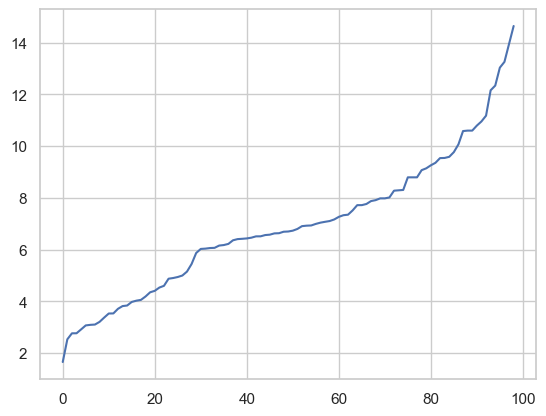

In [33]:
plt.plot(train_cnt_values)

In [34]:
train_cnt_happiness = Counter(' '.join(
    train[train['sentiment']=='happiness']['content_prep'].values))
train_cnt_total_happiness = sum(train_cnt_happiness.values())
train_cnt_happiness_values = []
for (c, i) in train_cnt_happiness.most_common():
    v  = np.log(train_cnt_total_happiness / i)
    train_cnt_happiness_values.append(v)
    print(f'{c}: {v: .4f}')

 :  1.6643
e:  2.5439
o:  2.7672
t:  2.8000
a:  2.8528
s:  3.1108
i:  3.1113
n:  3.1241
r:  3.2108
h:  3.3536
u:  3.5375
l:  3.5522
d:  3.7287
y:  3.7660
m:  3.8233
g:  3.9473
w:  4.0522
.:  4.1270
c:  4.2211
p:  4.3042
f:  4.3851
!:  4.4313
b:  4.5972
k:  4.6056
@:  4.9356
v:  5.0216
I:  5.0412
':  5.2768
,:  5.3735
T:  5.7257
H:  5.8337
A:  5.9043
S:  5.9496
/:  6.0144
M:  6.0320
O:  6.1459
j:  6.1737
L:  6.2269
E:  6.2470
x:  6.3008
W:  6.3315
D:  6.3767
G:  6.3844
;:  6.4040
?:  6.4079
Y:  6.4179
N:  6.4672
-:  6.5257
&:  6.5784
B:  6.6022
C:  6.6390
::  6.7333
P:  6.8194
q:  6.8559
R:  6.9135
F:  6.9572
z:  6.9921
1:  7.0395
0:  7.0660
2:  7.1292
J:  7.1752
3:  7.2786
U:  7.3272
4:  7.3422
):  7.5065
K:  7.6676
5:  7.7252
V:  7.8598
(:  7.9765
*:  8.0253
#:  8.0253
6:  8.1419
8:  8.2117
7:  8.4258
9:  8.5701
X:  8.5874
~:  8.8693
Z:  9.0196
+:  9.1648
=:  9.1965
Q:  9.1965
$:  9.3724
]:  9.3724
ï:  9.4524
¿:  9.4524
½:  9.4524
_:  9.7973
^:  9.9914
[:  10.3279
`:  10.4333
%:  10.5

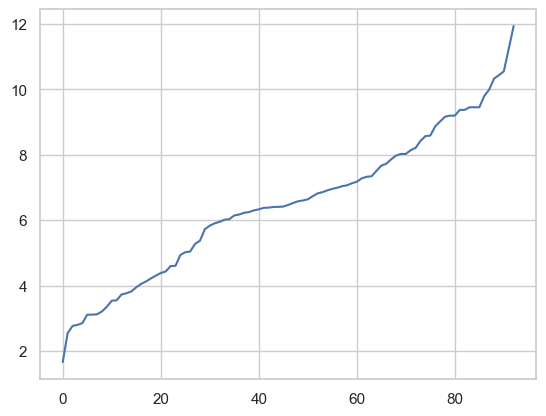

In [35]:
plt.plot(train_cnt_happiness_values)

In [37]:
train_cnt_worry = Counter(' '.join(
    train[train['sentiment']=='worry']['content_prep'].values))
train_cnt_total_worry = sum(train_cnt_worry.values())
train_cnt_worry_values = []
train_cnt_worry_vstotal_values = []
for (c, i) in train_cnt_worry.most_common():
    v = np.log(train_cnt_total_worry / i)
    train_cnt_worry_values.append(v)
    u = np.log(train_cnt_total / i)
    train_cnt_worry_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

 :  1.6371  3.1438
e:  2.5273  4.0340
t:  2.7317  4.2384
o:  2.7528  4.2595
a:  2.9397  4.4464
s:  3.0549  4.5616
i:  3.0644  4.5712
n:  3.0683  4.5751
r:  3.2002  4.7069
h:  3.3713  4.8780
l:  3.5255  5.0322
u:  3.5615  5.0682
d:  3.6715  5.1782
m:  3.8129  5.3196
y:  3.8616  5.3683
g:  3.9322  5.4389
.:  3.9582  5.4649
w:  4.0779  5.5846
c:  4.1836  5.6903
p:  4.3747  5.8814
f:  4.3910  5.8977
b:  4.4711  5.9778
k:  4.5873  6.0940
I:  4.7801  6.2868
':  5.0378  6.5445
v:  5.0424  6.5491
@:  5.0862  6.5930
!:  5.0946  6.6013
,:  5.4787  6.9854
T:  6.0430  7.5497
S:  6.1093  7.6161
?:  6.1219  7.6286
A:  6.1690  7.6757
O:  6.2435  7.7502
M:  6.2883  7.7950
j:  6.3867  7.8934
H:  6.3914  7.8981
/:  6.4275  7.9342
x:  6.4725  7.9792
W:  6.5064  8.0131
L:  6.6051  8.1119
N:  6.6273  8.1340
E:  6.6363  8.1430
D:  6.6670  8.1737
-:  6.8105  8.3173
B:  6.8360  8.3427
;:  6.8621  8.3688
G:  6.8640  8.3707
::  6.8851  8.3918
C:  6.9125  8.4192
&:  6.9761  8.4828
P:  6.9761  8.4828
2:  7.0532  

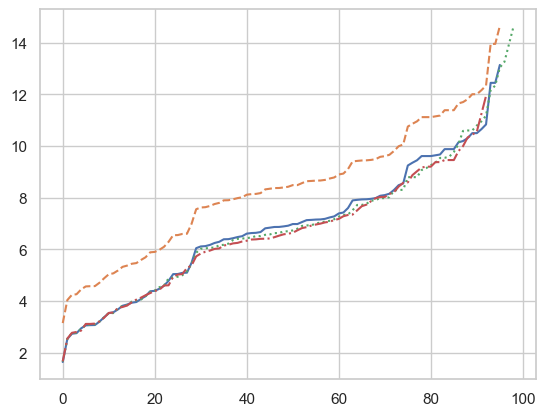

In [38]:
plt.plot(train_cnt_worry_values, linestyle='solid')
plt.plot(train_cnt_worry_vstotal_values, linestyle='dashed')
plt.plot(train_cnt_values, linestyle='dotted')
plt.plot(train_cnt_happiness_values, linestyle='dashdot')

In [39]:
train_cnt_anger = Counter(' '.join(
    train[train['sentiment']=='anger']['content_prep'].values))
train_cnt_total_anger = sum(train_cnt_anger.values())
train_cnt_anger_values = []
train_cnt_anger_vstotal_values = []
for (c, i) in train_cnt_anger.most_common():
    v = np.log(train_cnt_total_anger / i)
    train_cnt_anger_values.append(v)
    u = np.log(train_cnt_total / i)
    train_cnt_anger_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

 :  1.6460  7.4697
e:  2.5432  8.3669
t:  2.7735  8.5972
o:  2.8222  8.6459
a:  2.8681  8.6918
s:  3.0385  8.8622
i:  3.0699  8.8936
n:  3.1224  8.9461
r:  3.1778  9.0015
u:  3.4595  9.2832
h:  3.4690  9.2927
l:  3.5483  9.3720
d:  3.6287  9.4524
y:  3.8674  9.6911
g:  3.9183  9.7420
m:  3.9878  9.8115
w:  4.0370  9.8607
c:  4.1248  9.9485
f:  4.1248  9.9485
.:  4.1340  9.9577
p:  4.3973  10.2210
k:  4.3973  10.2210
b:  4.5676  10.3913
!:  4.6572  10.4809
I:  4.9243  10.7480
@:  5.1025  10.9262
v:  5.1272  10.9509
':  5.4149  11.2386
,:  5.5580  11.3817
E:  5.7716  11.5953
?:  5.7716  11.5953
S:  6.0435  11.8672
D:  6.0435  11.8672
T:  6.0435  11.8672
W:  6.1081  11.9318
x:  6.1771  12.0008
M:  6.3312  12.1549
L:  6.4182  12.2419
5:  6.4182  12.2419
/:  6.4182  12.2419
A:  6.5135  12.3372
j:  6.5135  12.3372
C:  6.5135  12.3372
H:  6.5135  12.3372
B:  6.6189  12.4426
P:  6.6189  12.4426
N:  6.6189  12.4426
U:  6.6189  12.4426
1:  6.7367  12.5604
-:  6.7367  12.5604
O:  6.7367  12.5604


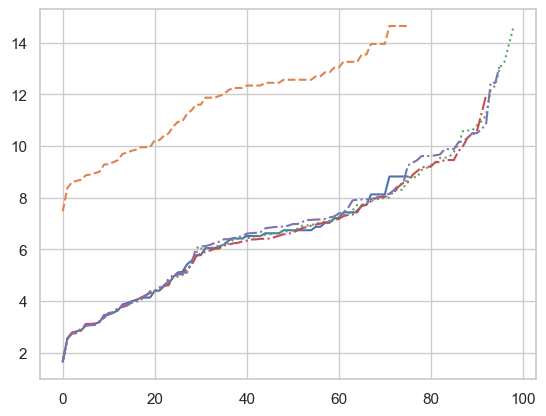

In [40]:
plt.plot(train_cnt_anger_values, linestyle='solid')
plt.plot(train_cnt_anger_vstotal_values, linestyle='dashed')
plt.plot(train_cnt_values, linestyle='dotted')
plt.plot(train_cnt_happiness_values, linestyle='dashdot')
plt.plot(train_cnt_worry_values, linestyle='dashdot')

In [41]:
train_text = ' '.join(
    train['content_prep'].values)

print('Top 2-grams from text:')
train_cnt2 = Counter(get_ngrams(train_text, n=2, stride=1))
train_cnt2_total = sum(train_cnt2.values())
train_cnt2_values = []
for (c, i) in train_cnt2.most_common():
    v = np.log(train_cnt2_total / i)
    train_cnt2_values.append(v)
    print(f'{c}: {v: .4f}')

Top 2-grams from text:
e :  3.7442
 t:  3.9199
t :  3.9877
er:  4.1838
s :  4.2489
r :  4.2693
in:  4.2983
 a:  4.3137
th:  4.3559
y :  4.4354
d :  4.5088
 i:  4.5395
he:  4.5637
 s:  4.5723
se:  4.5776
us:  4.6213
 w:  4.6278
o :  4.6346
. :  4.6929
 m:  4.6965
n :  4.7471
 h:  4.7948
an:  4.8029
ng:  4.8126
to:  4.8332
ou:  4.8393
re:  4.8791
ha:  4.8913
 b:  4.9239
on:  4.9260
 @:  4.9432
@u:  4.9550
g :  4.9817
 I:  5.0068
it:  5.0160
 o:  5.0208
..:  5.0463
or:  5.0553
 f:  5.0683
at:  5.0782
  :  5.1096
 g:  5.2130
st:  5.2173
 c:  5.2375
! :  5.2442
 d:  5.2463
nd:  5.2567
ll:  5.2572
me:  5.2577
a :  5.2702
is:  5.2835
 l:  5.2896
ve:  5.2950
l :  5.3432
ea:  5.3508
oo:  5.3579
te:  5.3868
I :  5.3888
 n:  5.3981
en:  5.4149
ee:  5.4294
ay:  5.4309
es:  5.4499
, :  5.4812
 y:  5.4962
ed:  5.5042
om:  5.5085
ot:  5.5096
ne:  5.5100
ar:  5.5184
al:  5.5259
ho:  5.5373
h :  5.5635
m :  5.5808
ti:  5.5833
hi:  5.6288
le:  5.6403
 p:  5.6444
as:  5.6496
yo:  5.6781
ut:  5.6877
no:  

In [43]:
print('Top 3-grams from text:')
train_cnt3 = Counter(get_ngrams(train_text, n=3, stride=1))
train_cnt3_total = sum(train_cnt3.values())
train_cnt3_values = []
for (c, i) in train_cnt3.most_common():
    v = np.log(train_cnt3_total / i)
    train_cnt3_values.append(v)
    print(f'{c}: {v: .4f}')

Top 3-grams from text:
er :  4.6223
 th:  4.6558
use:  4.8822
ser:  4.9305
ing:  4.9392
 to:  4.9525
@us:  4.9550
 @u:  4.9584
the:  5.0141
ng :  5.0435
to :  5.2733
he :  5.3066
 I :  5.4205
nd :  5.6260
 ha:  5.6824
 an:  5.7010
 a :  5.7153
...:  5.7486
ed :  5.7585
you:  5.7590
 yo:  5.7699
at :  5.8088
and:  5.8560
me :  5.8607
 go:  5.8674
is :  5.8756
ll :  5.8866
e t:  5.9098
re :  5.9210
ve :  5.9234
my :  5.9299
 it:  5.9345
 so:  5.9363
 my:  5.9390
 be:  5.9509
 wa:  5.9598
in :  5.9649
st :  5.9701
t t:  5.9708
ut :  5.9930
 fo:  5.9967
ay :  6.0270
hat:  6.0438
day:  6.0446
 in:  6.0572
 no:  6.0706
or :  6.0792
her:  6.0851
for:  6.0855
 on:  6.1143
on :  6.1192
 i :  6.1196
ou :  6.1475
.. :  6.1664
all:  6.1834
it :  6.2054
ly :  6.2088
e a:  6.2174
 is:  6.2191
 wi:  6.2194
 of:  6.2318
 do:  6.2628
tha:  6.2707
 lo:  6.2800
 me:  6.2908
ow :  6.3073
thi:  6.3255
 co:  6.3373
 we:  6.3465
d t:  6.3629
 mo:  6.3642
ot :  6.3642
wit:  6.3675
's :  6.3767
ome:  6.3783
te

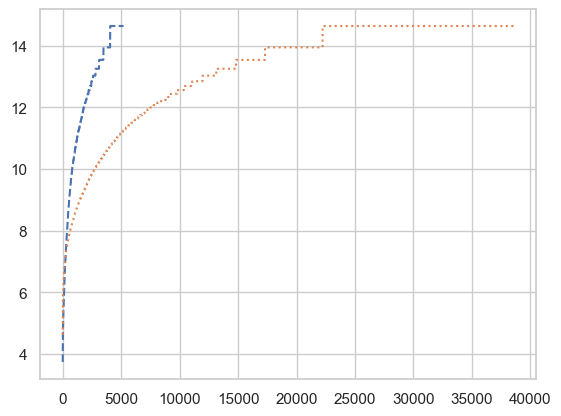

In [44]:
plt.plot(train_cnt2_values, linestyle='dashed')
plt.plot(train_cnt3_values, linestyle='dotted')

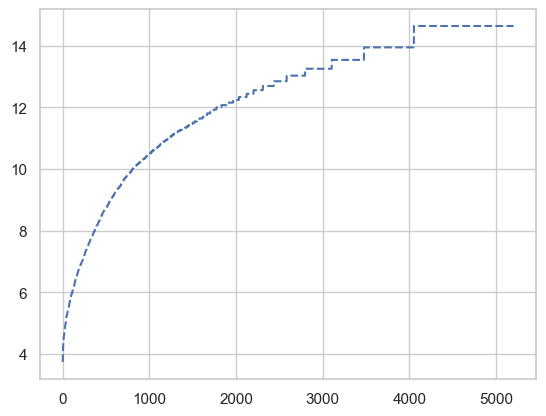

In [45]:
plt.plot(train_cnt2_values, linestyle='dashed')

In [46]:
train_anger_text = ' '.join(
    train[train['sentiment']=='anger']['content_prep'].values)

print('Top 2-grams from anger text:')
train_cnt2_anger = Counter(get_ngrams(train_anger_text, n=2, stride=1))
train_cnt2_anger_total = sum(train_cnt2_anger.values())
train_cnt2_anger_values = []
train_cnt2_anger_vstotal_values = []
for (c, i) in train_cnt2_anger.most_common():
    v = np.log(train_cnt2_anger_total / i)
    u = np.log(train_cnt2_total / i)
    train_cnt2_anger_values.append(v)
    train_cnt2_anger_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 2-grams from anger text:
t :  3.8055  9.6292
e :  3.8257  9.6494
 t:  4.0454  9.8691
 a:  4.0454  9.8691
s :  4.1911  10.0148
in:  4.2518  10.0755
er:  4.2835  10.1072
d :  4.2835  10.1072
r :  4.3053  10.1290
 i:  4.3735  10.1972
th:  4.4986  10.3223
he:  4.5676  10.3913
y :  4.5676  10.3913
se:  4.6114  10.4351
us:  4.6265  10.4502
 m:  4.6417  10.4654
 s:  4.6572  10.4809
n :  4.6572  10.4809
 w:  4.6572  10.4809
. :  4.7218  10.5455
ou:  4.7386  10.5623
o :  4.7557  10.5794
re:  4.8088  10.6325
it:  4.8271  10.6508
 b:  4.9041  10.7278
ng:  4.9243  10.7480
 h:  4.9243  10.7480
an:  4.9243  10.7480
 o:  4.9243  10.7480
g :  4.9449  10.7686
 f:  4.9449  10.7686
ha:  4.9449  10.7686
on:  4.9875  10.8112
  :  5.0094  10.8332
 I:  5.0094  10.8332
 g:  5.0319  10.8556
st:  5.0319  10.8556
to:  5.0549  10.8786
or:  5.1025  10.9262
 @:  5.1025  10.9262
@u:  5.1025  10.9262
is:  5.1272  10.9509
at:  5.1272  10.9509
! :  5.1526  10.9763
ed:  5.1526  10.9763
a :  5.2052  11.0289
ea:  5.20

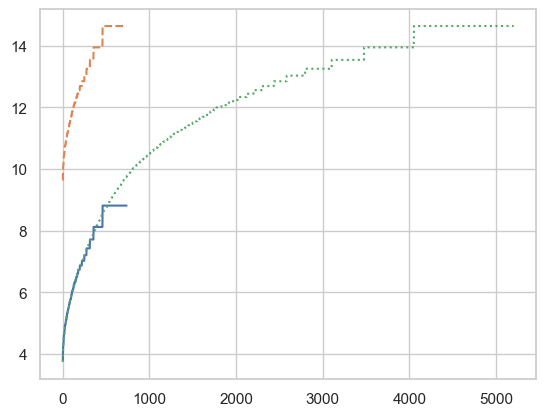

In [47]:
plt.plot(train_cnt2_anger_values)
plt.plot(train_cnt2_anger_vstotal_values, linestyle='dashed')
plt.plot(train_cnt2_values, linestyle='dotted')

In [48]:
print('Top 3-grams from anger text:')
train_cnt3_anger = Counter(get_ngrams(train_anger_text, n=3, stride=1))
train_cnt3_anger_total = sum(train_cnt3_anger.values())
train_cnt3_anger_values = []
train_cnt3_anger_vstotal_values = []
for (c, i) in train_cnt3_anger.most_common():
    v = np.log(train_cnt3_anger_total / i)
    u = np.log(train_cnt3_total / i)
    train_cnt3_anger_values.append(v)
    train_cnt3_anger_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 3-grams from anger text:
er :  4.7386  10.5623
 th:  4.8088  10.6325
ing:  4.9660  10.7897
ng :  5.0319  10.8556
ser:  5.0319  10.8556
use:  5.0549  10.8786
 @u:  5.1025  10.9262
@us:  5.1025  10.9262
 to:  5.1785  11.0022
the:  5.1785  11.0022
 I :  5.3821  11.2058
ed :  5.3821  11.2058
to :  5.4149  11.2386
me :  5.5203  11.3440
he :  5.5203  11.3440
 ha:  5.5203  11.3440
 a :  5.5203  11.3440
 it:  5.5972  11.4209
 an:  5.5972  11.4209
is :  5.6381  11.4618
at :  5.6381  11.4618
 me:  5.6381  11.4618
nd :  5.6806  11.5043
ut :  5.6806  11.5043
 my:  5.7251  11.5488
my :  5.7716  11.5953
 is:  5.8204  11.6441
it :  5.8204  11.6441
 yo:  5.8204  11.6441
you:  5.8204  11.6441
re :  5.8204  11.6441
 go:  5.8204  11.6441
st :  5.8717  11.6954
 of:  5.8717  11.6954
in :  5.8717  11.6954
 wa:  5.8717  11.6954
s a:  5.9257  11.7494
ll :  5.9257  11.7494
and:  5.9257  11.7494
t t:  5.9257  11.7494
e t:  5.9829  11.8066
 fo:  5.9829  11.8066
for:  5.9829  11.8066
t w:  5.9829  11.8066
 in

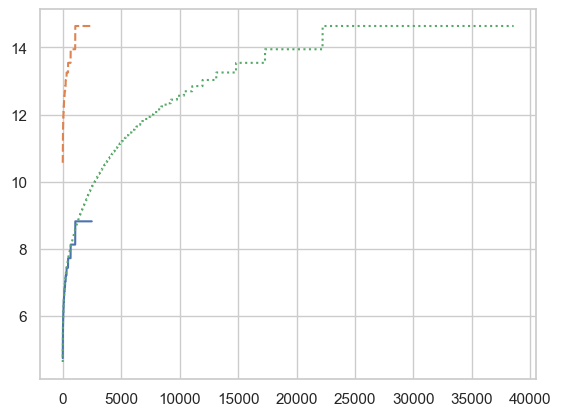

In [49]:
plt.plot(train_cnt3_anger_values)
plt.plot(train_cnt3_anger_vstotal_values, linestyle='dashed')
plt.plot(train_cnt3_values, linestyle='dotted')

In [50]:
train_happiness_text = ' '.join(
    train[train['sentiment']=='happiness']['content_prep'].values)

print('Top 2-grams from happiness text:')
train_cnt2_happiness = Counter(get_ngrams(train_happiness_text, n=2, stride=1))
train_cnt2_happiness_total = sum(train_cnt2_happiness.values())
train_cnt2_happiness_values = []
train_cnt2_happiness_vstotal_values = []
for (c, i) in train_cnt2_happiness.most_common():
    v = np.log(train_cnt2_happiness_total / i)
    u = np.log(train_cnt2_total / i)
    train_cnt2_happiness_values.append(v)
    train_cnt2_happiness_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 2-grams from happiness text:
e :  3.7626  5.7720
 t:  3.9563  5.9656
t :  4.1024  6.1117
er:  4.1822  6.1915
r :  4.2620  6.2714
s :  4.2709  6.2802
in:  4.2908  6.3001
 a:  4.3052  6.3145
th:  4.3541  6.3634
y :  4.3922  6.4015
d :  4.5484  6.5577
he:  4.6017  6.6110
se:  4.6145  6.6238
 w:  4.6225  6.6318
us:  4.6345  6.6438
 i:  4.6653  6.6746
 s:  4.6744  6.6837
o :  4.7302  6.7396
ha:  4.7306  6.7399
 m:  4.7351  6.7444
! :  4.7808  6.7901
n :  4.7851  6.7944
ng:  4.7914  6.8007
. :  4.7925  6.8019
an:  4.8064  6.8158
 h:  4.8089  6.8182
ou:  4.8489  6.8583
to:  4.8760  6.8853
re:  4.8794  6.8888
it:  4.9307  6.9400
 @:  4.9384  6.9477
@u:  4.9489  6.9583
g :  4.9694  6.9788
 f:  5.0044  7.0137
 b:  5.0078  7.0172
on:  5.0167  7.0260
  :  5.0401  7.0495
at:  5.0730  7.0823
or:  5.0741  7.0834
 g:  5.0963  7.1056
 o:  5.1049  7.1142
a :  5.1569  7.1662
oo:  5.1712  7.1805
 I:  5.1729  7.1822
..:  5.1915  7.2008
ay:  5.1956  7.2050
nd:  5.2232  7.2325
st:  5.2378  7.2472
me:  5.

In [51]:
print('Top 3-grams from happiness text:')
train_cnt3_happiness = Counter(get_ngrams(train_happiness_text, n=3, stride=1))
train_cnt3_happiness_total = sum(train_cnt3_happiness.values())
train_cnt3_happiness_values = []
train_cnt3_happiness_vstotal_values = []
for (c, i) in train_cnt3_happiness.most_common():
    v = np.log(train_cnt3_happiness_total / i)
    u = np.log(train_cnt3_total / i)
    train_cnt3_happiness_values.append(v)
    train_cnt3_happiness_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 3-grams from happiness text:
er :  4.6423  6.6516
 th:  4.6782  6.6876
use:  4.8968  6.9061
ing:  4.9176  6.9269
ser:  4.9302  6.9395
@us:  4.9489  6.9583
 @u:  4.9512  6.9606
 to:  4.9784  6.9878
the:  5.0162  7.0255
ng :  5.0376  7.0470
he :  5.2813  7.2906
to :  5.3361  7.3454
 ha:  5.6076  7.6170
 a :  5.6375  7.6468
 I :  5.6513  7.6607
nd :  5.6607  7.6700
you:  5.7069  7.7162
 yo:  5.7217  7.7311
 an:  5.7450  7.7543
 go:  5.7522  7.7615
day:  5.7698  7.7792
at :  5.7846  7.7939
ay :  5.7985  7.8079
me :  5.8192  7.8286
 wa:  5.8655  7.8748
and:  5.8678  7.8771
 fo:  5.8712  7.8806
...:  5.9103  7.9196
 it:  5.9115  7.9208
st :  5.9175  7.9269
e t:  5.9359  7.9453
ed :  5.9384  7.9477
ll :  5.9496  7.9590
 be:  5.9547  7.9640
for:  5.9648  7.9741
re :  5.9919  8.0013
 so:  5.9959  8.0052
my :  6.0011  8.0105
or :  6.0158  8.0251
is :  6.0333  8.0427
ve :  6.0347  8.0440
in :  6.0361  8.0454
 my:  6.0388  8.0481
t t:  6.0610  8.0703
ou :  6.1099  8.1192
her:  6.1173  8.1266
 

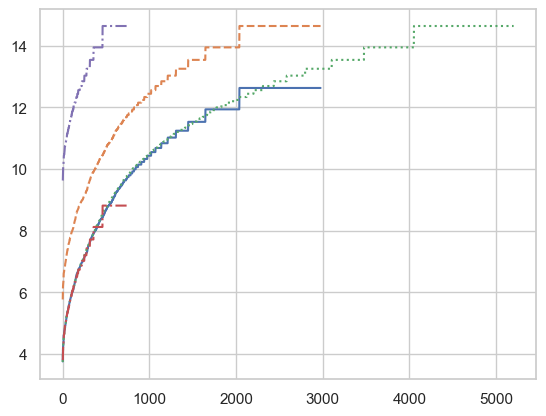

In [52]:
plt.plot(train_cnt2_happiness_values)
plt.plot(train_cnt2_happiness_vstotal_values, linestyle='dashed')
plt.plot(train_cnt2_values, linestyle='dotted')

plt.plot(train_cnt2_anger_values, linestyle='dashdot')
plt.plot(train_cnt2_anger_vstotal_values, linestyle='dashdot')

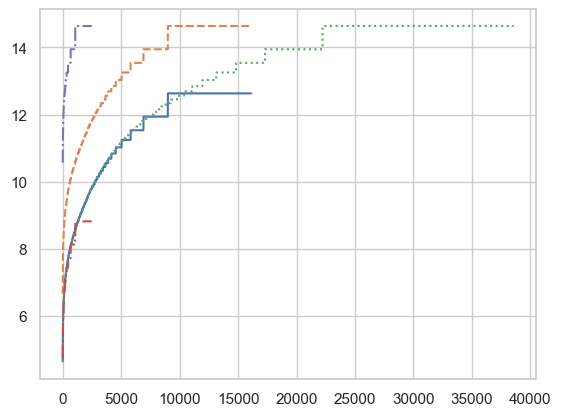

In [53]:
plt.plot(train_cnt3_happiness_values)
plt.plot(train_cnt3_happiness_vstotal_values, linestyle='dashed')
plt.plot(train_cnt3_values, linestyle='dotted')

plt.plot(train_cnt3_anger_values, linestyle='dashdot')
plt.plot(train_cnt3_anger_vstotal_values, linestyle='dashdot')

In [54]:
train_neutral_text = ' '.join(
    train[train['sentiment']=='neutral']['content_prep'].values)

print('Top 2-grams from happiness text:')
train_cnt2_neutral = Counter(get_ngrams(train_neutral_text, n=2, stride=1))
train_cnt2_neutral_total = sum(train_cnt2_neutral.values())
train_cnt2_neutral_values = []
train_cnt2_neutral_vstotal_values = []
for (c, i) in train_cnt2_neutral.most_common():
    v = np.log(train_cnt2_neutral_total / i)
    u = np.log(train_cnt2_total / i)
    train_cnt2_neutral_values.append(v)
    train_cnt2_neutral_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 2-grams from happiness text:
e :  3.7486  5.4196
 t:  3.9105  5.5816
t :  4.0270  5.6980
er:  4.0669  5.7379
r :  4.1398  5.8109
in:  4.2651  5.9361
s :  4.2881  5.9591
 a:  4.3630  6.0341
th:  4.3707  6.0418
se:  4.3943  6.0653
us:  4.4410  6.1121
y :  4.5505  6.2216
he:  4.5733  6.2443
d :  4.5769  6.2480
 i:  4.5869  6.2580
o :  4.6319  6.3030
 w:  4.6338  6.3049
 s:  4.6665  6.3376
n :  4.6878  6.3589
 @:  4.6998  6.3708
@u:  4.7111  6.3822
. :  4.7427  6.4138
an:  4.8008  6.4719
ou:  4.8011  6.4722
 m:  4.8060  6.4770
ng:  4.8125  6.4836
to:  4.8180  6.4891
on:  4.8716  6.5427
re:  4.8720  6.5430
 h:  4.8790  6.5500
g :  4.9864  6.6574
 b:  4.9891  6.6601
 o:  5.0004  6.6715
it:  5.0084  6.6795
ha:  5.0176  6.6886
or:  5.0472  6.7183
at:  5.0759  6.7470
 I:  5.0782  6.7492
..:  5.1340  6.8050
 f:  5.1511  6.8222
  :  5.1511  6.8222
 c:  5.2028  6.8738
st:  5.2281  6.8992
me:  5.2452  6.9163
ll:  5.2685  6.9395
nd:  5.2886  6.9596
a :  5.3002  6.9713
 g:  5.3205  6.9916
 d:  5.

In [55]:
print('Top 3-grams from happiness text:')
train_cnt3_neutral = Counter(get_ngrams(train_neutral_text, n=3, stride=1))
train_cnt3_neutral_total = sum(train_cnt3_neutral.values())
train_cnt3_neutral_values = []
train_cnt3_neutral_vstotal_values = []
for (c, i) in train_cnt3_neutral.most_common():
    v = np.log(train_cnt3_neutral_total / i)
    u = np.log(train_cnt3_total / i)
    train_cnt3_neutral_values.append(v)
    train_cnt3_neutral_vstotal_values.append(u)
    print(f'{c}: {v: .4f} {u: .4f}')

Top 3-grams from happiness text:
er :  4.4444  6.1155
use:  4.6505  6.3216
 th:  4.6675  6.3385
ser:  4.6944  6.3655
@us:  4.7111  6.3822
 @u:  4.7145  6.3856
ing:  4.9459  6.6169
 to:  4.9574  6.6285
the:  5.0155  6.6865
ng :  5.0458  6.7168
to :  5.2519  6.9229
he :  5.3210  6.9920
 I :  5.5280  7.1991
nd :  5.6416  7.3127
you:  5.7118  7.3828
 an:  5.7231  7.3942
 yo:  5.7324  7.4035
 a :  5.7864  7.4575
ed :  5.7986  7.4697
me :  5.8315  7.5025
...:  5.8323  7.5033
at :  5.8613  7.5324
re :  5.8622  7.5332
and:  5.8804  7.5514
 ha:  5.8845  7.5556
in :  5.9032  7.5742
ll :  5.9169  7.5880
is :  5.9353  7.6063
 fo:  5.9423  7.6134
e t:  5.9540  7.6250
ut :  5.9850  7.6560
 in:  5.9887  7.6597
on :  5.9924  7.6635
 wa:  6.0037  7.6747
 it:  6.0056  7.6766
 on:  6.0065  7.6776
 go:  6.0065  7.6776
 no:  6.0113  7.6823
t t:  6.0160  7.6871
st :  6.0237  7.6948
 be:  6.0276  7.6986
for:  6.0442  7.7152
ou :  6.0530  7.7241
or :  6.0550  7.7261
ve :  6.0580  7.7291
ay :  6.0894  7.7605
 

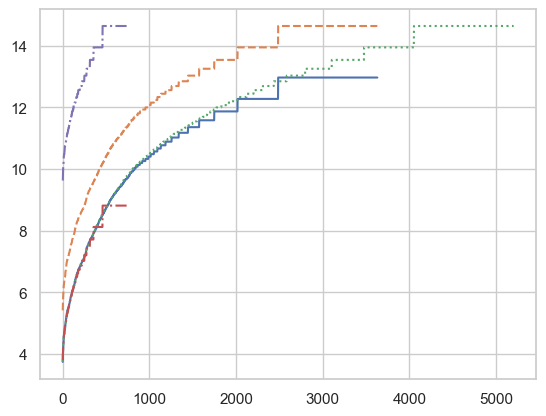

In [56]:
plt.plot(train_cnt2_neutral_values)
plt.plot(train_cnt2_neutral_vstotal_values, linestyle='dashed')
plt.plot(train_cnt2_values, linestyle='dotted')

plt.plot(train_cnt2_anger_values, linestyle='dashdot')
plt.plot(train_cnt2_anger_vstotal_values, linestyle='dashdot')

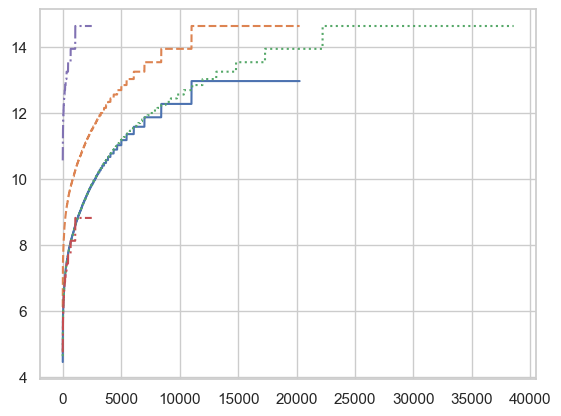

In [57]:
plt.plot(train_cnt3_neutral_values)
plt.plot(train_cnt3_neutral_vstotal_values, linestyle='dashed')
plt.plot(train_cnt3_values, linestyle='dotted')

plt.plot(train_cnt3_anger_values, linestyle='dashdot')
plt.plot(train_cnt3_anger_vstotal_values, linestyle='dashdot')

In [58]:
train_cnt.keys()

dict_keys(['@', 'u', 's', 'e', 'r', ' ', 't', 'h', 'a', 'n', 'k', 'y', 'o', 'j', 'w', 'c', 'i', 'g', 'm', 'p', 'l', 'f', "'", '?', 'd', 'b', ',', '.', 'I', 'q', '!', 'D', '&', ';', 'O', 'T', 'v', '`', 'S', '2', 'A', 'x', '3', ':', '/', '6', '5', 'z', 'G', '*', 'X', 'M', 'N', 'W', ')', 'C', '#', '-', 'V', 'B', 'J', 'E', 'R', 'Y', 'H', 'P', 'L', '%', '$', 'F', 'U', '4', '(', '1', '0', '8', 'ï', '¿', '½', '7', 'K', '9', '~', '+', 'Q', '=', '[', ']', '^', 'Z', '_', '\\', '\t', 'Â', '\xa0', '{', '}', '|', '´'])

In [59]:
train_cnt_log = Counter()

In [60]:
train_cnt_values

[1.6527465044254208,
 2.53005604917392,
 2.7617322417586845,
 2.763635839715727,
 2.914481855992199,
 3.0671000097473575,
 3.0890801724090977,
 3.100458622120835,
 3.2036259209520526,
 3.369133233102631,
 3.5268662857195268,
 3.530438011639639,
 3.7082156744725325,
 3.8140015216071257,
 3.83661987005807,
 3.9743839315328136,
 4.023457689786483,
 4.054070801569557,
 4.185874252521359,
 4.347981107029222,
 4.403296191354845,
 4.530295882116153,
 4.597659570839664,
 4.872440098524415,
 4.898911720284782,
 4.938205381566093,
 4.99555816516272,
 5.1465603907372985,
 5.439127523139174,
 5.866436921286904,
 6.023145048162364,
 6.034983816795267,
 6.057777354327698,
 6.0653032600280445,
 6.153499990314401,
 6.173290241449542,
 6.217818513651063,
 6.356832825320949,
 6.402871470002097,
 6.414854039148968,
 6.429425262958778,
 6.4583808223441785,
 6.509173549902967,
 6.510646521151758,
 6.559274552239053,
 6.574242090781459,
 6.624163903506212,
 6.630790832993821,
 6.687910136209363,
 6.69674880

In [82]:
train_cnt

Counter({' ': 436732,
         'e': 181637,
         't': 144075,
         'o': 143801,
         'a': 123666,
         's': 106162,
         'i': 103854,
         'n': 102679,
         'r': 92614,
         'h': 78487,
         'u': 67034,
         'l': 66795,
         'd': 55916,
         'm': 50303,
         'y': 49178,
         'g': 42849,
         '.': 40797,
         'w': 39567,
         'c': 34681,
         'p': 29491,
         'f': 27904,
         'b': 24576,
         'k': 22975,
         '!': 17455,
         'I': 16999,
         '@': 16344,
         'v': 15433,
         "'": 13270,
         ',': 9904,
         'T': 6460,
         'S': 5523,
         '?': 5458,
         '/': 5335,
         'A': 5295,
         'H': 4848,
         'M': 4753,
         'O': 4546,
         'j': 3956,
         'L': 3778,
         'x': 3733,
         'E': 3679,
         'W': 3574,
         'N': 3397,
         'D': 3392,
         ';': 3231,
         '-': 3183,
         'G': 3028,
         'B': 3008,
    

In [83]:
dict(train_cnt)

{'@': 16344,
 'u': 67034,
 's': 106162,
 'e': 181637,
 'r': 92614,
 ' ': 436732,
 't': 144075,
 'h': 78487,
 'a': 123666,
 'n': 102679,
 'k': 22975,
 'y': 49178,
 'o': 143801,
 'j': 3956,
 'w': 39567,
 'c': 34681,
 'i': 103854,
 'g': 42849,
 'm': 50303,
 'p': 29491,
 'l': 66795,
 'f': 27904,
 "'": 13270,
 '?': 5458,
 'd': 55916,
 'b': 24576,
 ',': 9904,
 '.': 40797,
 'I': 16999,
 'q': 2230,
 '!': 17455,
 'D': 3392,
 '&': 2841,
 ';': 3231,
 'O': 4546,
 'T': 6460,
 'v': 15433,
 '`': 47,
 'S': 5523,
 '2': 1936,
 'A': 5295,
 'x': 3733,
 '3': 1500,
 ':': 2816,
 '/': 5335,
 '6': 755,
 '5': 972,
 'z': 2001,
 'G': 3028,
 '*': 782,
 'X': 263,
 'M': 4753,
 'N': 3397,
 'W': 3574,
 ')': 1017,
 'C': 2726,
 '#': 782,
 '-': 3183,
 'V': 838,
 'B': 3008,
 'J': 1470,
 'E': 3679,
 'R': 2247,
 'Y': 2551,
 'H': 4848,
 'P': 2289,
 'L': 3778,
 '%': 57,
 '$': 165,
 'F': 2099,
 'U': 1599,
 '4': 1247,
 '(': 869,
 '1': 1768,
 '0': 1880,
 '8': 581,
 'ï': 347,
 '¿': 347,
 '½': 347,
 '7': 565,
 'K': 1016,
 '9': 573

In [88]:
train_cnt['c']

34681

2 channels: tf (local) & idf (global)

In [85]:
import collections

In [145]:
def get_ngram_feature(text, ngram=1, stride=1):
    features = get_ngrams(text, n=ngram, stride=1)
    return features

def get_window_segments(text, window_length=5, stride=1):
    return get_ngrams(text, n=window_length, stride=stride)

def get_window_features(text, 
                        context_counter, global_counter,
                        ngram=1, ngram_stride=1):
    ngram_features = get_ngram_feature(text, ngram, ngram_stride)
    local_counter = Counter(ngram_features)
    local_counter_total = sum(local_counter.values())
    context_counter_total = sum(context_counter.values())
    global_counter_total = sum(global_counter.values())

    features = []
    for c in ngram_features:
        i = local_counter[c]
        v = np.log(context_counter_total / i)
        u = np.log(global_counter_total / i)
        t = i / local_counter_total
        f = np.array([t,v,u], dtype=float)
        features.append(f)
    features = np.vstack(features)
    return features

def extract_features(text, ngram=1, ngram_stride=1,
                     window_length=5, window_stride=1, 
                     requires_special_tokens=False,
                    corpus_counter=train_cnt):
    
    if requires_special_tokens:
        text = '<BOS>' + text + '<EOS>'
    context_counter = Counter(get_ngram_feature(
                        text, ngram, ngram_stride))
    win_segments = get_window_segments(
                        text, window_length, window_stride)

    features = [get_window_features(
                    w, context_counter, 
                    corpus_counter, 
                    ngram, ngram_stride) for w in win_segments]
    features = np.vstack(features).T
    return features
    

In [146]:
train_features = train['content_prep'].apply(
    extract_features)
print(train_features.shape)

(32000,)


In [115]:
df['content'].apply(len).describe()

count    40000.000000
mean        73.405550
std         36.558015
min          1.000000
25%         43.000000
50%         69.000000
75%        103.000000
max        167.000000
Name: content, dtype: float64

In [81]:
train['content_prep'].apply(
    lambda x: len(extract_features(x))).describe()

count    32000.000000
mean        80.259687
std         36.218061
min         11.000000
25%         50.000000
50%         75.000000
75%        109.000000
max        177.000000
Name: content_prep, dtype: float64

In [147]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def pad_features(arr, pad_to_length=1024, trim=True):
    arr = np.pad(arr, ((0,0), (1, 1)), 'constant', constant_values=((0,0),(-1., -2.)))
    if trim:
        arr = arr[:,:pad_to_length]
    p = pad_to_length - arr.shape[-1]
    arr = np.pad(arr, ((0,0), (0, p)), 'constant', constant_values=((0,0),(0, 0)))
    return arr

In [174]:
padded_train_features = [pad_features(i) for i in (train_features)]
padded_train_features = np.stack(padded_train_features)
print(padded_train_features.shape)

(32000, 3, 1024)


In [151]:
test_features = test['content_prep'].apply(extract_features)
print(test_features.shape)

(8000,)


In [175]:
padded_test_features = [pad_features(i) for i in (test_features)]
padded_test_features = np.stack(padded_test_features)
print(padded_test_features.shape)

(8000, 3, 1024)


In [176]:
x_train = padded_train_features
x_test = padded_test_features

In [158]:
# Encode Labels
encoder = LabelEncoder()
encoder.fit(train['sentiment'])

y_train = encoder.transform(train['sentiment'])
y_test = encoder.transform(test['sentiment'])
print(y_train.shape, y_test.shape, sep=' ')
# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight = "balanced", 
    classes = np.unique(y_train),
    y = y_train )
print(class_weights)

(32000,) (8000,)
[27.97202797 17.21355568  3.71833604  4.05525282  1.73225789  0.59072197
  2.3265959   0.80076072  0.35622843  2.01600202  0.59572567  1.40659341
  0.36375624]


In [159]:
classnames = encoder.classes_
labels = classnames
classnames

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [163]:
data_dir = 'data/nlp/'

In [167]:
np.save(f'{data_dir}preprocessed/text_emotion.signals_3channels_win5stride1.train.npy', x_train)
np.save(f'{data_dir}preprocessed/text_emotion.signals_3channels_win5stride1.test.npy', x_test)
np.save(f'{data_dir}preprocessed/text_emotion.classnames.npy', classnames)
np.save(f'{data_dir}preprocessed/text_emotion.labels_13emotions.train.npy', y_train)
np.save(f'{data_dir}preprocessed/text_emotion.labels_13emotions.test.npy', y_test)

In [177]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep=' ')

(32000, 3, 1024) (32000,) (8000, 3, 1024) (8000,)


## Modeling with IConNet

In [168]:
import torch
from einops import rearrange, reduce, repeat
from torch.utils.data import TensorDataset, DataLoader

def create_data_loader(x_train, y_train, 
                       x_test, y_test, batch_size=32):
    x_train = torch.tensor(x_train)
    y_train = torch.tensor(y_train)
    x_test = torch.tensor(x_test)
    y_test = torch.tensor(y_test)
    train_data = TensorDataset(x_train, y_train)
    test_data = TensorDataset(x_test, y_test)
    
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
    return train_loader, test_loader

In [178]:
batch_size = 256
train_loader, test_loader = create_data_loader(x_train, y_train, 
                       x_test, y_test, batch_size=batch_size)

In [180]:
os.getcwd()

'/Users/linh/projects'

In [181]:
os.chdir('IConNet/')

In [183]:
os.getcwd()

'/Users/linh/projects/IConNet'

In [186]:
import sys
sys.path.insert(0, '/Users/linh/projects/IConNet')

In [198]:
os.chdir('../')

In [199]:
os.getcwd()

'/Users/linh/projects/IConNet'

In [191]:
from IConNet import IConNet

In [203]:
visualize_window = IConNet.signal.visualize_window
general_cosine_window = IConNet.signal.general_cosine_window
Downsample2 = IConNet.FIRConv.Downsample2

AttributeError: module 'IConNet.IConNet' has no attribute 'FIRConv'

In [195]:
from .signal import visualize_window, general_cosine_window
from .FIRConv import Downsample2

class M9(nn.Module):
    def __init__(self, n_input=1, n_output=35, 
                 stride=16, n_channel=128, eps=1e-12):
        super().__init__()
        self.conv1 = Downsample2(n_input, n_channel, 
                                kernel_size=511, stride=2, window_k=2)
        self.conv3 = Downsample2(n_channel, n_channel, 
                                kernel_size=127, stride=4, window_k=3)
        self.layer_norm = nn.LayerNorm(3*n_channel)
        self.eps = eps
        self.cls_head = nn.Sequential(
            nn.Linear(3*n_channel, 2*n_channel),
            nn.PReLU(2*n_channel),
            nn.Linear(2*n_channel, n_output)
        )

        self.act = NLReLU(beta=1.0)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.act(x1)
        x3 = self.act(self.conv3(x2))
        x1 = reduce(x1, 'b c n -> b () c', 'mean')
        x2 = reduce(x2, 'b c n -> b () c', 'mean')
        x3 = reduce(x3, 'b c n -> b () c', 'mean')
        x = torch.cat([x1, x2, x3], dim=-1)
        x = rearrange(x, 'b 1 c -> b c')
        x = self.layer_norm(x)
        x = self.cls_head(x)
        return x 

class NLReLU(nn.Module):
    def __init__(self, beta=1.):
        super().__init__()
        self.beta = beta

    def forward(self, x):
        return nl_relu(x, self.beta)
        
def nl_relu(x, beta=1.):
    return torch.log(1 + beta * F.relu(x)) 

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

model = M9(n_input=3, n_output=len(labels))
print(model)

print("Number of parameters: %s" % count_parameters(model))

ImportError: attempted relative import with no known parent package